# Q) Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python. 

## ====================================================================== 

# 1) Delivery_time -> Predict delivery time using sorting time 


# 1. <u>Import necessasary libraries - 

In [79]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

## <u>Import warnings  - 

In [80]:
import warnings
warnings.filterwarnings('ignore')

# 2. <u>Import Data - 

In [81]:
delivery_time = pd.read_csv('delivery_time.csv')
delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# 3. <u>Data Understanding - 

## 3.1 Initial Analysis

In [82]:
delivery_time.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [83]:
delivery_time.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [84]:
delivery_time.shape

(21, 2)

## 3.2 Assumptions Check

### 1. Linearity Test

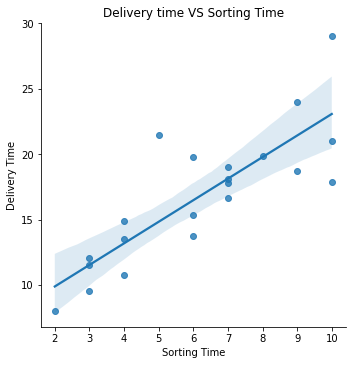

In [85]:
sns.lmplot(x = 'Sorting Time', y = 'Delivery Time', data = delivery_time)
plt.title('Delivery time VS Sorting Time')
plt.show()

**Linearty Test Failed**

### 2. Test for Normality

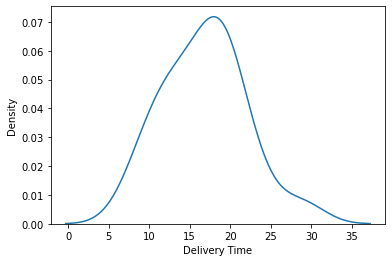

In [86]:
sns.distplot(a = delivery_time['Delivery Time'],hist=False)
plt.show()

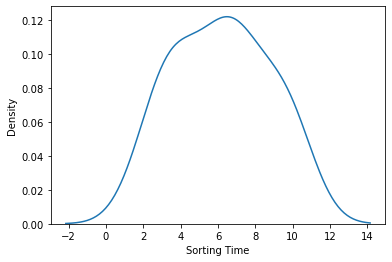

In [87]:
sns.distplot(a = delivery_time['Sorting Time'],hist=False)
plt.show()

In [88]:
print(round(delivery_time.skew(),2))

Delivery Time    0.35
Sorting Time     0.05
dtype: float64


In [89]:
print(round(delivery_time.kurtosis(),2))

Delivery Time    0.32
Sorting Time    -1.15
dtype: float64


**Normality test Failed.** 

# 4. <u>Model Building using SKLEARN library -  

In [90]:
x = delivery_time[['Sorting Time']]
y = delivery_time[['Delivery Time']]

In [91]:
x

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [92]:
y

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


# 5. <u>Model Training - 

In [93]:
linear_model = LinearRegression() #Model Initialization
linear_model

LinearRegression()

In [94]:
linear_model.fit(x,y) #Training happens

LinearRegression()

In [95]:
linear_model.coef_

array([[1.6490199]])

In [96]:
linear_model.intercept_

array([6.58273397])

# 6. <u>Model Testing - 

In [97]:
y_pred = linear_model.predict(x)
y_pred

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

# 7. <u>Model Evaluation - 

In [98]:
y

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [99]:
y_pred

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

In [100]:
error = y - y_pred
error

,Delivery Time
0,-2.072933
1,0.321186
2,3.273147
3,2.576087
4,5.927067
5,-1.126853
6,0.874127
7,-2.029794
8,-5.172933
9,-2.673913


# 8. <u>Now, we can check for Homoscadasicity and Zero Residual Mean

## Homoscedasticity

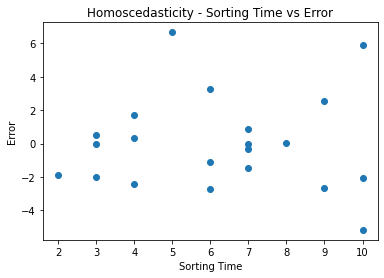

In [101]:
plt.scatter(x = x,y = error)
plt.title('Homoscedasticity - Sorting Time vs Error')
plt.xlabel('Sorting Time')
plt.ylabel('Error')
plt.show()

## Zero residual Mean 

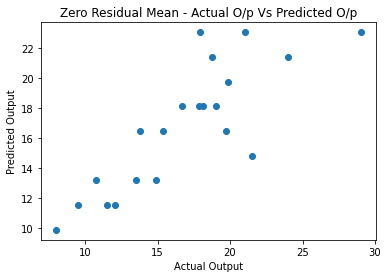

In [102]:
plt.scatter(x = y, y =y_pred )
plt.title('Zero Residual Mean - Actual O/p Vs Predicted O/p')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

In [ ]:
print('R2 Score =',r2_score(y,y_pred))
print('Mean Absolute Error =',mean_absolute_error(y,y_pred))
print('Mean Squared Error',mean_squared_error(y,y_pred))

# 9. Scaling of data 

In [ ]:
std = StandardScaler()
scaled_x = std.fit_transform(x)
scaled_x

In [ ]:
scaled_x = pd.DataFrame(scaled_x)

In [ ]:
scaled_x

In [ ]:
scaled_x ['Scaled_x'] = scaled_x

In [ ]:
scaled_x

In [ ]:
scaled_x = scaled_x.drop(labels = 0, axis = 1)
scaled_x

### Training -

In [ ]:
scaled_linear_model = LinearRegression() #Model Initialization
scaled_linear_model

In [ ]:
linear_model.fit(scaled_x,y) #Training happens

### Testing -  

In [ ]:
y_pred_scaled = linear_model.predict(scaled_x)
y_pred_scaled

In [ ]:
print('R2 Score =',r2_score(y,y_pred_scaled))
print('Mean Absolute Error =',mean_absolute_error(y,y_pred_scaled))
print('Mean Squared Error =',mean_squared_error(y,y_pred_scaled))

#  10. <u>Transformation - 

### 10.1  Taking log  

In [ ]:
x_log = np.log(x)
x_log

### Training -

In [ ]:
log_model = LinearRegression()
log_model

In [ ]:
log_model.fit(x_log,y)

### Testing -  

In [ ]:
y_pred_log = log_model.predict(x_log)
y_pred_log

In [ ]:
print('R2 Square =',r2_score(y,y_pred_log))
print('Mean Absolute Error =',mean_absolute_error(y,y_pred_log))
print('Mean Squared Error =',mean_squared_error(y,y_pred_log))

### 10.2  Taking square root 

In [ ]:
x_sqrt = np.sqrt(x)
x_sqrt

### Training -

In [ ]:
sqrt_model = LinearRegression()
sqrt_model

In [ ]:
sqrt_model.fit(x_sqrt,y)
sqrt_model

### Testing -  

In [ ]:
y_pred_sqrt = sqrt_model.predict(x_sqrt)
y_pred_sqrt

In [ ]:
print('R2 Score =',r2_score(y,y_pred_sqrt))
print('Mean Absolute Error =',mean_absolute_error(y,y_pred_sqrt))
print('Mean Squared Error =',mean_squared_error(y,y_pred_sqrt))

### 10.3  Taking square 

In [ ]:
x_square = np.square(x)
x_square

### Training -

In [ ]:
square_model = LinearRegression()
square_model

In [ ]:
square_model.fit(x_square,y)

### Testing -  

In [ ]:
y_pred_square = square_model.predict(x_square)
y_pred_square

In [ ]:
print('R2 Score =',r2_score(y,y_pred_square))
print('Mean Absolute Error =',mean_absolute_error(y,y_pred_square))
print('Mean Squared Error =',mean_squared_error(y,y_pred_square))

###  10.4  Taking Sin

In [ ]:
x_sin = np.sin(x)
x_sin

### Training -

In [ ]:
sin_model = LinearRegression()
sin_model

In [ ]:
sin_model.fit(x_sin,y)

### Testing -  

In [ ]:
y_pred_sin = sin_model.predict(x_sin)
y_pred_sin

In [ ]:
print('R2 Score =',r2_score(y,y_pred_sin))
print('Mean Absolute Error =',mean_absolute_error(y,y_pred_sin))
print('Mean Squared Error =',mean_squared_error(y,y_pred_sin))

# After transformation we can say that square root of x has the highest r2 square and the best model.

# ============================================================= 

# ============================================================= 

# 2) Salary_hike -> Build a prediction model for Salary_hike  

# 1. <u>Import Data - 

In [ ]:
salary_hike = pd.read_csv('Salary_Data.csv')
salary_hike

# 2.<u>Data Preparation - 

In [ ]:
salary_hike = salary_hike.sort_values(by = 'YearsExperience',ascending = True)
salary_hike

In [ ]:
salary_hike['Salary Hike'] = salary_hike['Salary'].pct_change(periods = 1)

In [ ]:
salary_hike

# 3. <u>Data Understanding - 

# 3.1 Initial Analysis

In [ ]:
salary_hike.shape

In [ ]:
salary_hike.isna().sum()

In [ ]:
salary_hike.dtypes

In [ ]:
salary_hike.info()

## 3.2 Assumptions Check

### Linearty  Check -

In [ ]:
sns.lmplot(x = 'YearsExperience', y = 'Salary', data = salary_hike )
plt.show()

In [ ]:
sns.lmplot(x = 'YearsExperience', y = 'Salary Hike', data = salary_hike )
plt.show()

**Linearty test failed** 

### Normality Test - 

In [ ]:
sns.distplot(a = salary_hike['Salary'],hist = False)
plt.show()

In [ ]:
sns.distplot(a = salary_hike['Salary Hike'], hist = False)
plt.show()

In [ ]:
sns.histplot(a = salary_hike['YearsExperience'], hist = False )
plt.show()

**Normality Test is failed** 

In [ ]:
print(salary_hike.skew())

In [ ]:
print(salary_hike.kurtosis())

# 4. <u>Model Building using SKLEARN library -  

In [ ]:
x = salary_hike.drop(labels=['Salary Hike'],axis = 1)
y = salary_hike[['Salary Hike']]

In [ ]:
x

In [ ]:
y

# 5. <u>Model Training -  

In [ ]:
salary_model = LinearRegression()
salary_model

In [ ]:
salary_model.fit(x,y)

In [ ]:
salary_model.coef_

In [ ]:
salary_model.intercept_

# 6. <u>Model Testing - 

In [ ]:
y_pred = salary_model.predict(x)
y_pred

# 7. <u>Model Evaluation - 

In [ ]:
error = y - y_pred
error

# 8. <u>Homoscadacity and Zero Residual mean test - 

## 8.1  Homoscedasticity

In [ ]:
plt.scatter(x = salary_hike['YearsExperience'] ,y = error)
plt.title('Homoscedasticity - Years Of Experience vs Error')
plt.xlabel('Years Of Experience')
plt.ylabel('Error')
plt.show()

In [ ]:
plt.scatter(x = salary_hike['Salary'] ,y = error)
plt.title('Homoscedasticity - Salary vs Error')
plt.xlabel('Salary')
plt.ylabel('Error')
plt.show()

In [ ]:
plt.scatter(x = salary_hike['Salary Hike'] ,y = error)
plt.title('Homoscedasticity - Salary Hike vs Error')
plt.xlabel('Salary Hike')
plt.ylabel('Error')
plt.show()

### Observation

Homoscedasticity Check **failed**.

## 8.1  Zero Residual Mean 

In [ ]:
plt.scatter(x = y,y = y_pred)
plt.title('Zero Residual Mean - Actual O/p Vs Predicted O/p')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

### Observation:

Zero Residual Mean Test is also Fails.

In [ ]:
print('R2 Score =',r2_score(y,y_pred))
print('Mean Absolute Error =',mean_absolute_error(y,y_pred))
print('Mean Squared Error',mean_squared_error(y,y_pred))

# 9. Scaling of data 

In [ ]:
std = StandardScaler()
scaled_x = std.fit_transform(x)
scaled_x

### Training -

In [ ]:
scaled_model = LinearRegression()
scaled_model

In [ ]:
scaled_model.fit(scaled_x, y)

### Testing -

In [ ]:
y_pred_scaled = scaled_model.predict(scaled_x)
y_pred_scaled

In [ ]:
print('R2 Score =',r2_score(y,y_pred_scaled))
print('Mean Absolute Error =',mean_absolute_error(y,y_pred_scaled))
print('Mean Squared Error',mean_squared_error(y,y_pred_scaled))

#  10. <u>Transformation - 

### 10.1  Taking log  

In [103]:
x_log = np.log(x)
x_log

,Sorting Time
0,2.302585
1,1.386294
2,1.791759
3,2.197225
4,2.302585
5,1.791759
6,1.945910
7,1.098612
8,2.302585
9,2.197225


### Training -

In [ ]:
log_model = LinearRegression()
log_model

In [ ]:
log_model.fit(x_log,y)

### Testing -  

In [ ]:
y_pred_log = log_model.predict(x_log)
y_pred_log

In [ ]:
print('R2 Square =',r2_score(y,y_pred_log))
print('Mean Absolute Error =',mean_absolute_error(y,y_pred_log))
print('Mean Squared Error =',mean_squared_error(y,y_pred_log))

### 10.2  Taking square root 

In [ ]:
x_sqrt = np.sqrt(x)
x_sqrt

### Training -

In [ ]:
sqrt_model = LinearRegression()
sqrt_model

In [ ]:
sqrt_model.fit(x_sqrt,y)
sqrt_model

### Testing -  

In [ ]:
y_pred_sqrt = sqrt_model.predict(x_sqrt)
y_pred_sqrt

In [ ]:
print('R2 Score =',r2_score(y,y_pred_sqrt))
print('Mean Absolute Error =',mean_absolute_error(y,y_pred_sqrt))
print('Mean Squared Error =',mean_squared_error(y,y_pred_sqrt))

### 10.3  Taking square 

In [ ]:
x_square = np.square(x)
x_square

### Training -

In [ ]:
square_model = LinearRegression()
square_model

In [ ]:
square_model.fit(x_square,y)

### Testing -  

In [ ]:
y_pred_square = square_model.predict(x_square)
y_pred_square

In [ ]:
print('R2 Score =',r2_score(y,y_pred_square))
print('Mean Absolute Error =',mean_absolute_error(y,y_pred_square))
print('Mean Squared Error =',mean_squared_error(y,y_pred_square))

###  10.4  Taking Sin

In [ ]:
x_sin = np.sin(x)
x_sin

### Training -

In [ ]:
sin_model = LinearRegression()
sin_model

In [ ]:
sin_model.fit(x_sin,y)

### Testing -  

In [ ]:
y_pred_sin = sin_model.predict(x_sin)
y_pred_sin

In [ ]:
print('R2 Score =',r2_score(y,y_pred_sin))
print('Mean Absolute Error =',mean_absolute_error(y,y_pred_sin))
print('Mean Squared Error =',mean_squared_error(y,y_pred_sin))

# After transformation we can say that SCALED x has the highest r2 square and the best model.